In [1]:
# Import libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer, StandardScaler

from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_theme()

In [2]:
# Load the dataset and save in 'wholesale_df'
wholesale_df = pd.read_csv('/content/Wholesale_Data.csv')

# Load the first 5 rows of the dataframe
wholesale_df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
# Print information about the 'diabetes_df' DataFrame
wholesale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [6]:
# Statistics summary
wholesale_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


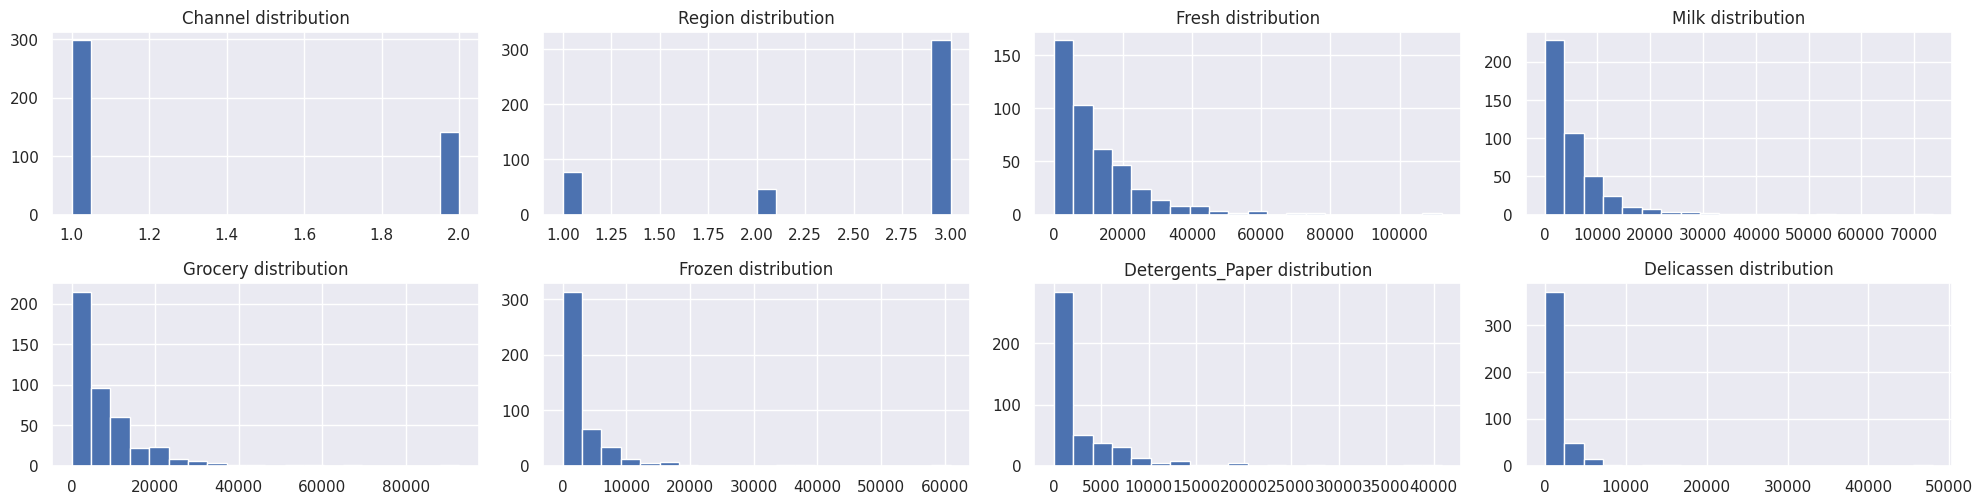

In [7]:
# Plot the histograms for all columns
def draw_histograms(dataframe, features, rows, cols):

    fig = plt.figure(figsize=(20,20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        dataframe[feature].hist(bins=20, ax=ax)
        ax.set_title(feature+' distribution')

    fig.tight_layout()
    plt.ticklabel_format(useOffset=False, style='plain')
    plt.show()

draw_histograms(wholesale_df, wholesale_df.columns, 8, 4)

In [8]:
# There's no missing values
wholesale_df.isnull().sum()

,0
Channel,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0


In [9]:
# There's no duplicated rows
wholesale_df.duplicated().sum()

np.int64(0)

The count of customers per each channel type: 
 Channel
1    298
2    142
Name: count, dtype: int64

The percentage of customers per each channel type: 
 Channel
1    67.727273
2    32.272727
Name: proportion, dtype: float64


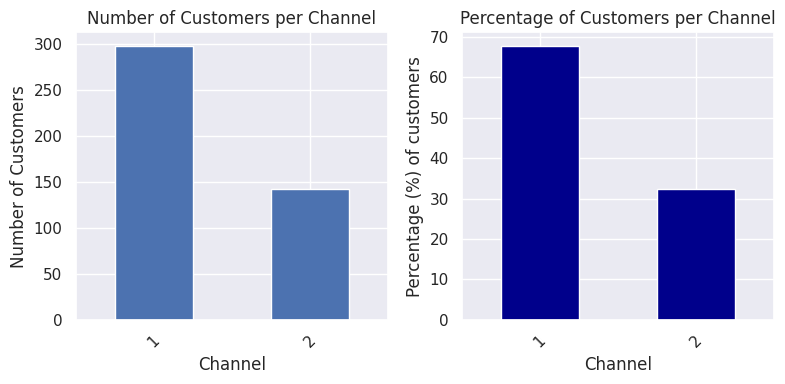

In [10]:
# Calculate actual numbers of customers per each channel type
channel_counts = wholesale_df['Channel'].value_counts().sort_values(ascending=False)
print('The count of customers per each channel type: \n', channel_counts)

# Calculate percentages of customers per each channel type
channel_perc = wholesale_df['Channel'].value_counts(normalize=True).sort_values(ascending=False) * 100
print('\nThe percentage of customers per each channel type: \n', channel_perc)

# Plot actual numbers of customers per each channel type
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
channel_counts.plot(kind='bar')
plt.title('Number of Customers per Channel')
plt.xlabel('Channel')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Plot percentages of customers per each channel type
plt.subplot(1, 2, 2)
channel_perc.plot(kind='bar', color='darkblue')
plt.title('Percentage of Customers per Channel')
plt.xlabel('Channel')
plt.ylabel('Percentage (%) of customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

The count of customers per each region: 
 Channel
1    298
2    142
Name: count, dtype: int64

The percentage of customers per each region: 
 Region
3    71.818182
1    17.500000
2    10.681818
Name: proportion, dtype: float64


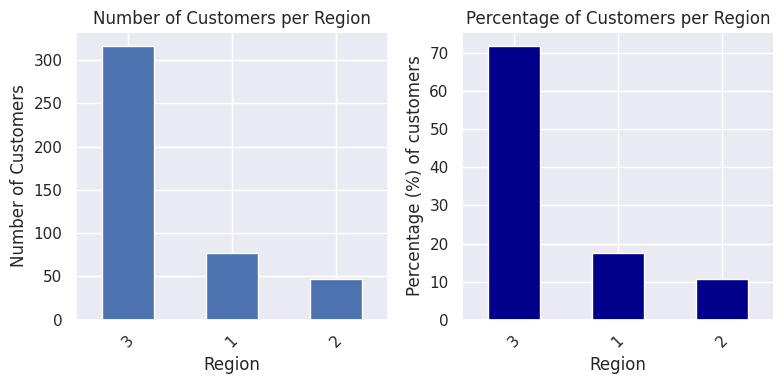

In [11]:
# Calculate actual numbers of customers per each region
region_counts = wholesale_df['Region'].value_counts().sort_values(ascending=False)
print('The count of customers per each region: \n', channel_counts)

# Calculate percentages of customers per each region
region_perc = wholesale_df['Region'].value_counts(normalize=True).sort_values(ascending=False) * 100
print('\nThe percentage of customers per each region: \n', region_perc)

# Plot actual numbers of customers per each region
plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
region_counts.plot(kind='bar')
plt.title('Number of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)

# Plot percentages of customers per each channel type
plt.subplot(1, 2, 2)
region_perc.plot(kind='bar', color='darkblue')
plt.title('Percentage of Customers per Region')
plt.xlabel('Region')
plt.ylabel('Percentage (%) of customers')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

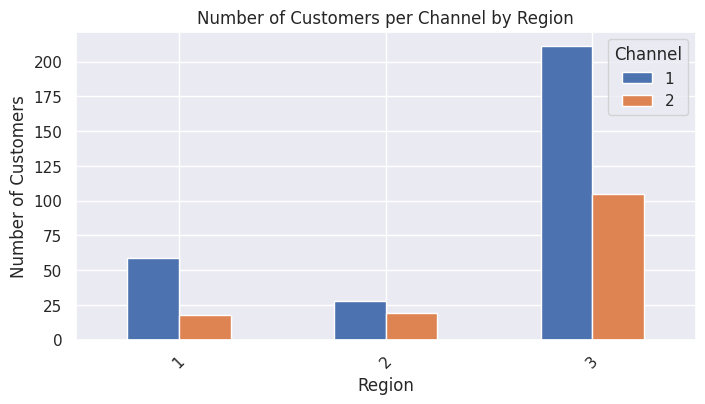

In [12]:
# Group by 'Channel' and 'Region' and count the number of customers
channel_region_counts = wholesale_df.groupby(['Channel', 'Region']).size().unstack()

# Plot the counts of customers per 'Channel' by 'Region'
channel_region_counts.T.plot(kind='bar', figsize=(8, 4))
plt.title('Number of Customers per Channel by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Channel')
plt.show()

In [13]:
# Separate the Horeca customer channel in a variable for data exploration
horeca_channel = wholesale_df.loc[wholesale_df['Channel'] == 1].reset_index(drop=True)

# Calculate a new column 'Total_Spend' across all product categories
horeca_channel['Total_Spend'] = horeca_channel[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

horeca_channel

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend
0,1,3,13265,1196,4221,6404,507,1788,27381
1,1,3,5963,3648,6192,425,1716,750,18694
2,1,3,10253,1114,3821,397,964,412,16961
3,1,3,5876,6157,2933,839,370,4478,20653
4,1,3,7780,2495,9464,669,2518,501,23427
...,...,...,...,...,...,...,...,...,...
293,1,3,16731,3922,7994,688,2371,838,32544
294,1,3,29703,12051,16027,13135,182,2204,73302
295,1,3,39228,1431,764,4510,93,2346,48372
296,1,3,10290,1981,2232,1038,168,2125,17834


In [14]:
# Separate the Retail customer channel in a variable for data exploration
retail_channel = wholesale_df.loc[wholesale_df['Channel'] == 2].reset_index(drop=True)

# Calculate a new column 'Total_Spend' across all product categories
retail_channel['Total_Spend'] = retail_channel[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].sum(axis=1)

retail_channel

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total_Spend
0,2,3,12669,9656,7561,214,2674,1338,34112
1,2,3,7057,9810,9568,1762,3293,1776,33266
2,2,3,6353,8808,7684,2405,3516,7844,36610
3,2,3,22615,5410,7198,3915,1777,5185,46100
4,2,3,9413,8259,5126,666,1795,1451,26710
...,...,...,...,...,...,...,...,...,...
137,2,3,660,8494,18622,133,6740,776,35425
138,2,3,17063,4847,9053,1031,3415,1784,37193
139,2,3,17565,3686,4657,1059,1803,668,29438
140,2,3,16980,2884,12232,874,3213,249,36432


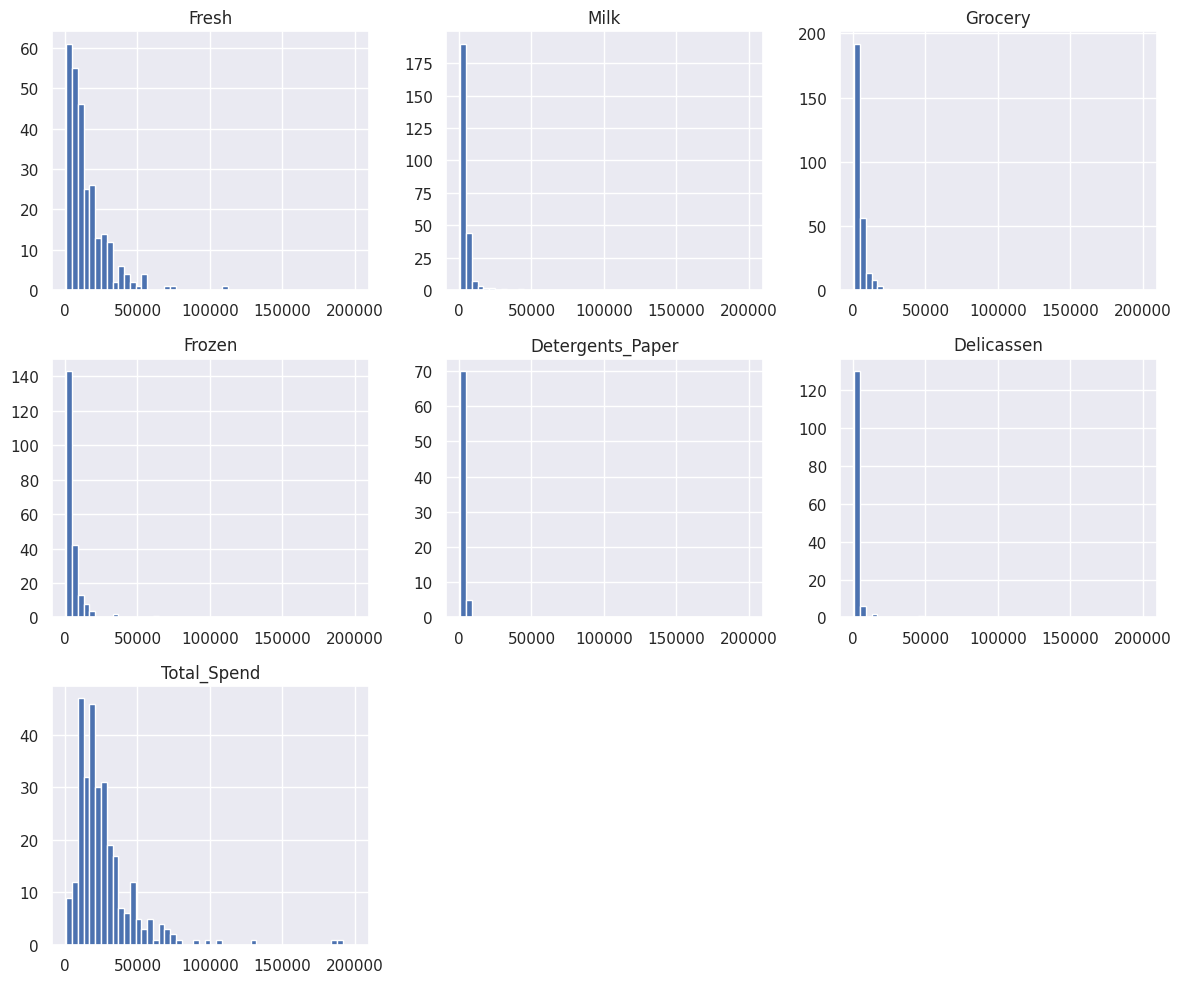

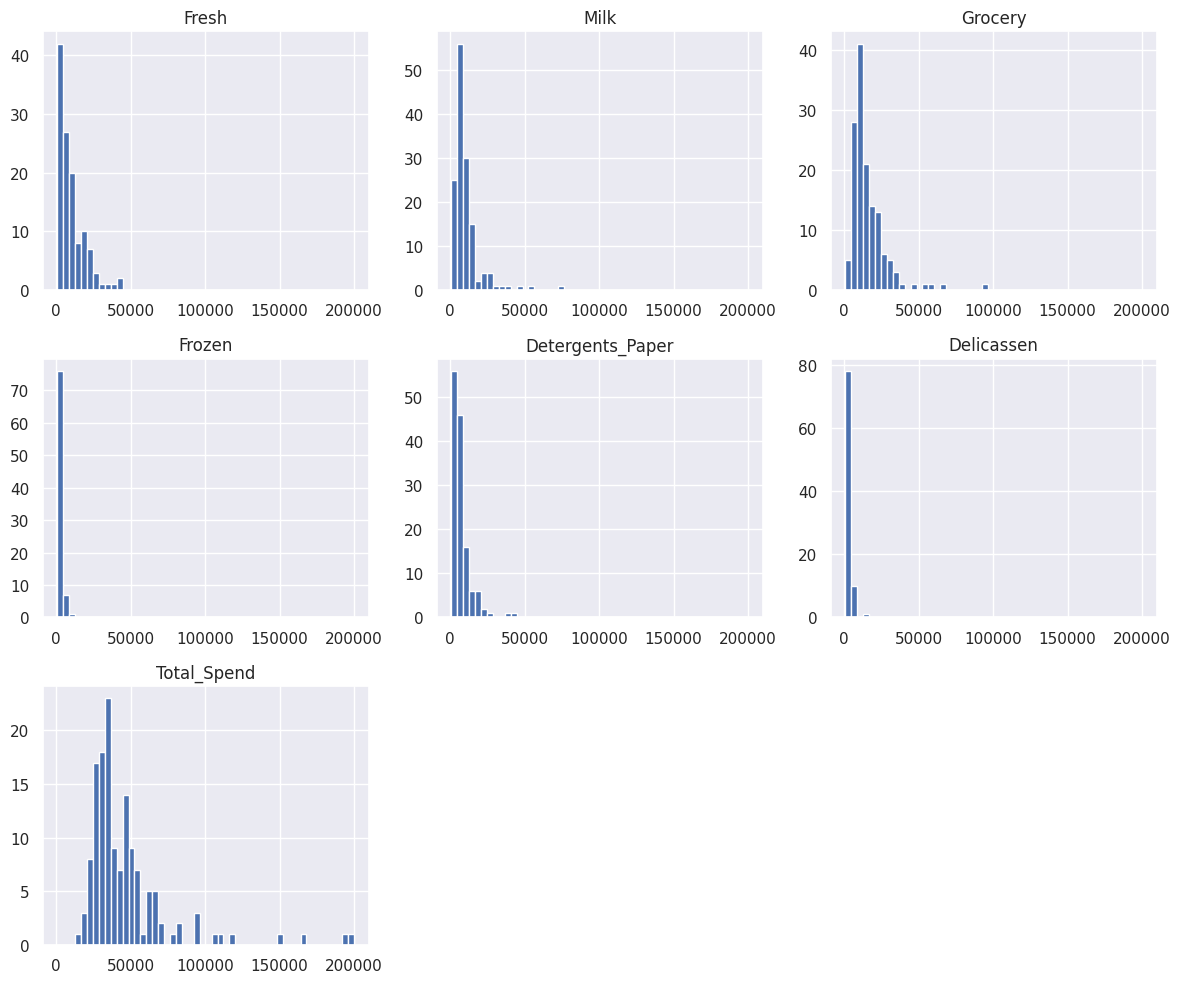

In [15]:
# Determine global min and max for each shared column of the 'horeca_channel' and 'retail_channel' dataframes to compare the spending behaviors
# Except for categorical columns: 'Channel', 'Region'
cols = horeca_channel.drop(columns=['Channel', 'Region']).columns
xlims = {}

for feature in cols:
    global_min = np.min([horeca_channel[feature].min(), retail_channel[feature].min()])
    global_max = np.max([horeca_channel[feature].max(), retail_channel[feature].max()])
    xlims[feature] = (global_min, global_max)

# Plot horeca_channel annual spending across product categories with global axis limits
horeca_channel.drop(columns=['Channel', 'Region']).hist(figsize=(12, 10), bins=50, range=xlims[feature])

plt.tight_layout()
plt.show()

# Plot retail_channel pending across product categories with global axis limits
retail_channel.drop(columns=['Channel', 'Region']).hist(figsize=(12, 10), bins=50, range=xlims[feature])

plt.tight_layout()
plt.show()

In [16]:
horeca_channel['Total_Spend'].describe()

,Total_Spend
count,298.000000
mean,26844.191275
std,22164.839073
min,904.000000
25%,13859.250000
50%,21254.500000
75%,32113.750000
max,190169.000000


In [17]:
retail_channel['Total_Spend'].describe()

,Total_Spend
count,142.000000
mean,46619.232394
std,29346.866491
min,14993.000000
25%,30147.250000
50%,37139.000000
75%,51650.500000
max,199891.000000


In [18]:
# Select only columns with numeric data types
numeric_cols = wholesale_df[['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']].columns.tolist()
print(numeric_cols)

# Select only columns with categorical data types
cat_cols = wholesale_df

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']


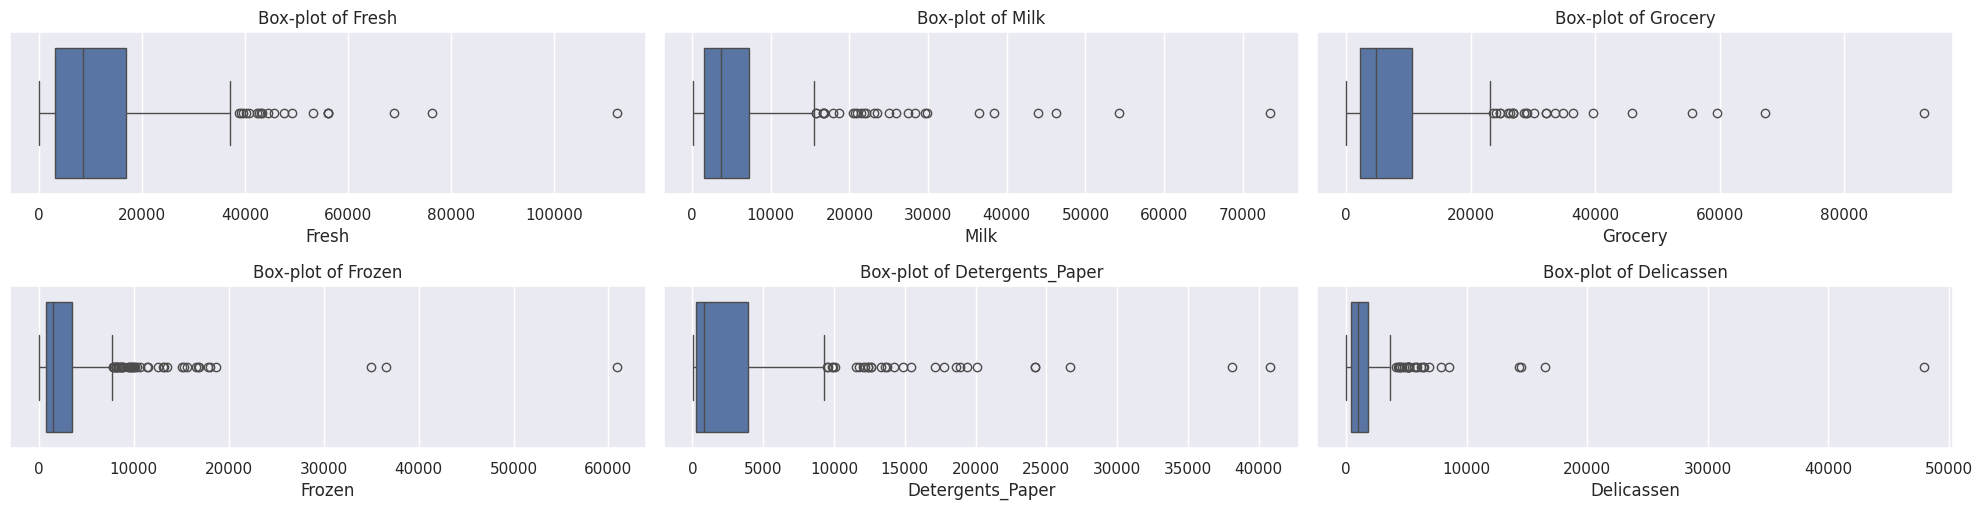

In [19]:
# Plot the boxplots for numeric columns to dectect outliers
def draw_boxplot(dataframe, features, rows, cols):

    fig = plt.figure(figsize=(20,20))

    for i, feature in enumerate(features):
        ax = fig.add_subplot(rows, cols, i+1)
        sns.boxplot(data=dataframe, x=dataframe[feature])
        ax.set_title('Box-plot of '+ feature)

    fig.tight_layout()
    plt.show()

# Exclude the categorical 'Channel', 'Region' columns from the columns list
draw_boxplot(wholesale_df, wholesale_df[numeric_cols], 8, 3)

In [20]:
# Check the current dimension of wholesale_df before treating the outliers
wholesale_df.shape

(440, 8)

In [21]:
# Function to remove outliers out of the Z-score range
def remove_outliers(dataframe, col):

    q1 = dataframe[col].quantile(0.25)
    q3 = dataframe[col].quantile(0.75)
    iqr = q3 - q1

    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    return dataframe[(dataframe[col] >= lower_bound) & (dataframe[col] <= upper_bound)]

# Applying the function on each column, excluding the categorical 'Channel', 'Region' columns
for col in wholesale_df[numeric_cols].columns:
    wholesale_df = remove_outliers(wholesale_df, col)

# View 'wholesale_df' after removing the outliers that are out of the Z-score range
wholesale_df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


In [22]:
# Drop duplicated rows, if any at this point
wholesale_df.drop_duplicates(inplace=True)

In [23]:
# Check again the current shape of wholesale_df after treating the outliers
wholesale_df.shape

(318, 8)

In [24]:
# Use the corr() method to find the pairwise correlation of all columns
wholesale_df.corr()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.145904,-0.083583,0.616291,0.708853,-0.180617,0.772343,0.202762
Region,0.145904,1.000000,-0.006608,0.099850,0.102724,-0.075077,0.099916,0.092540
Fresh,-0.083583,-0.006608,1.000000,-0.056104,-0.064819,0.200101,-0.202086,0.211049
Milk,0.616291,0.099850,-0.056104,1.000000,0.736872,-0.165518,0.685531,0.290687
Grocery,0.708853,0.102724,-0.064819,0.736872,1.000000,-0.201720,0.845943,0.272322
Frozen,-0.180617,-0.075077,0.200101,-0.165518,-0.201720,1.000000,-0.185918,0.075176
Detergents_Paper,0.772343,0.099916,-0.202086,0.685531,0.845943,-0.185918,1.000000,0.163153
Delicassen,0.202762,0.092540,0.211049,0.290687,0.272322,0.075176,0.163153,1.000000


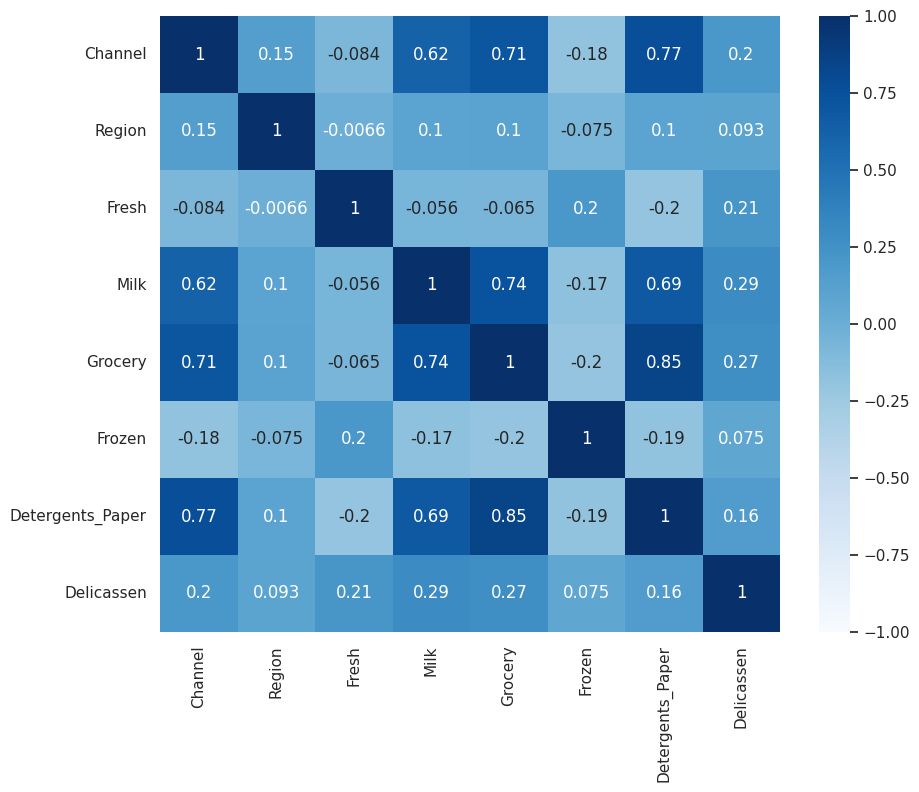

In [25]:
# Use a correlation matrix heatmap to check the relationship between the different variables
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(wholesale_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.show()

In [26]:
# Copy 'wholesale_df' into the X features set
X = wholesale_df.copy()
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


In [27]:
# Copy 'wholesale_df' into another X_selected features set. We can do feature selection on this set.
X_selected = wholesale_df.copy()
X_selected

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
3,1,3,13265,1196,4221,6404,507,1788
5,2,3,9413,8259,5126,666,1795,1451
6,2,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...,...
432,1,3,21117,1162,4754,269,1328,395
433,1,3,1982,3218,1493,1541,356,1449
434,1,3,16731,3922,7994,688,2371,838
438,1,3,10290,1981,2232,1038,168,2125


In [28]:
X_selected = X_selected.drop(columns=['Channel'])
X_selected

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
3,3,13265,1196,4221,6404,507,1788
5,3,9413,8259,5126,666,1795,1451
6,3,12126,3199,6975,480,3140,545
...,...,...,...,...,...,...,...
432,3,21117,1162,4754,269,1328,395
433,3,1982,3218,1493,1541,356,1449
434,3,16731,3922,7994,688,2371,838
438,3,10290,1981,2232,1038,168,2125


In [29]:
X_selected.Milk.nunique()

303

In [30]:
X_selected.Grocery.nunique()

313

In [31]:
X.Detergents_Paper.nunique()

306

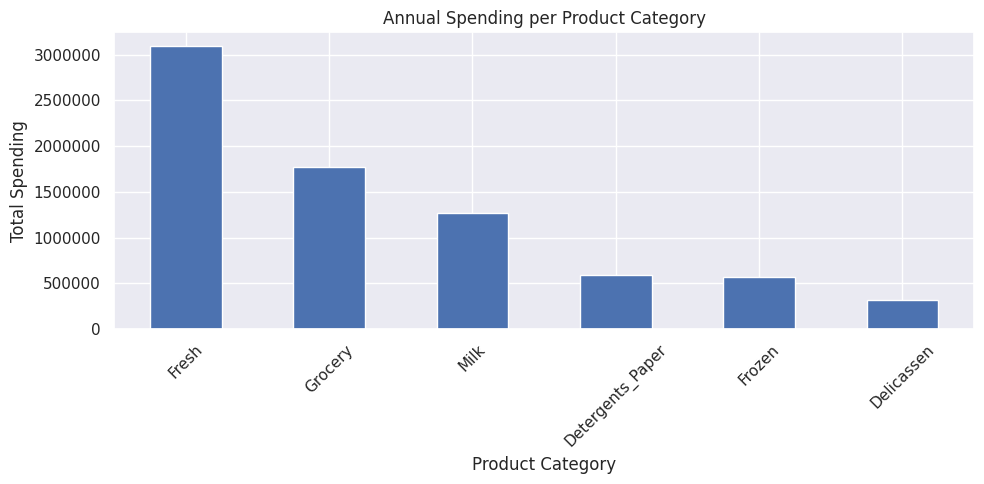

In [32]:
# Calculate the sum of annual spending per each product category
category_sums = X[numeric_cols].sum().sort_values(ascending=False)

# Plot the sum of annual spending per each product category
plt.figure(figsize=(10, 5))
category_sums.plot(kind='bar')
plt.title('Annual Spending per Product Category')
plt.ylabel('Total Spending')
plt.xlabel('Product Category')

# Reset y-axis formatter to ScalarFormatter
plt.gca().yaxis.set_major_formatter(ScalarFormatter())
plt.ticklabel_format(style='plain', axis='y')  # This will remove scientific notation
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

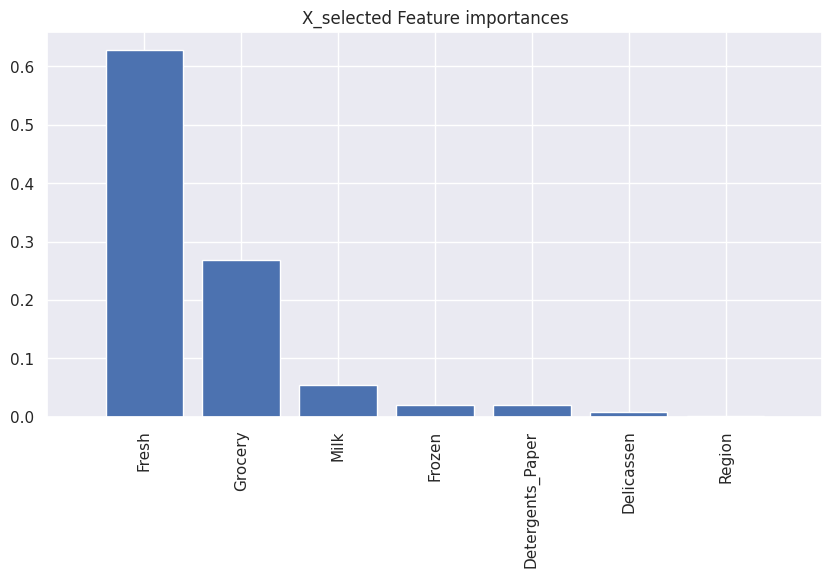

In [33]:
# Fit RandomForest to find feature imporance on X_selected
model = RandomForestRegressor(n_estimators=100)
model.fit(X_selected, X_selected)

# Get feature importances of X_selected
importances = model.feature_importances_

# Plot feature importances of X_selected
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 5))
plt.title('X_selected Feature importances')
plt.bar(range(X_selected.shape[1]), importances[indices], align='center')
plt.xticks(range(X_selected.shape[1]), X_selected.columns[indices], rotation=90)
plt.xlim([-1, X_selected.shape[1]])
plt.show()

In [34]:
# Seperate a 'X_selected' features set without the 'Detergents_Pape' and 'Milk' columns
X_selected = X_selected.drop(columns=['Detergents_Paper', 'Milk'])
X_selected

,Region,Fresh,Grocery,Frozen,Delicassen
0,3,12669,7561,214,1338
1,3,7057,9568,1762,1776
3,3,13265,4221,6404,1788
5,3,9413,5126,666,1451
6,3,12126,6975,480,545
...,...,...,...,...,...
432,3,21117,4754,269,395
433,3,1982,1493,1541,1449
434,3,16731,7994,688,838
438,3,10290,2232,1038,2125


In [35]:
# The shape of the full features set at this point
X.shape

(318, 8)

In [36]:
# The shape of the selected features set at this point
X_selected.shape

(318, 5)

In [38]:
# Transformation pipeline fitting on X - the full feature datasets

# Define the log transformation we want as a function
def log_transform(X1):
    X1_log = np.log(X1)
    return X1_log

# Wrap the function inside a FunctionTransformer.
# This variable can now be used in a pipeline.
log_transform_object = FunctionTransformer(log_transform)

# Define the pipeline for numeric columns
numeric_cols_pipeline = Pipeline(steps=[('log_transform', log_transform_object),
                                        ('scaling', StandardScaler())
                                        ])

# Define the column transformer
preprocessor = ColumnTransformer(transformers=[
                                        ('cat', 'passthrough', ['Channel', 'Region']),
                                        ('num', numeric_cols_pipeline, ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])
                                        ])

# Fit the column transformer to X
preprocessor.fit(X)

ColumnTransformer(transformers=[('cat', 'passthrough', ['Channel', 'Region']),
                                ('num',
                                 Pipeline(steps=[('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x7dd73e4f8900>)),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['Fresh', 'Milk', 'Grocery', 'Frozen',
                                  'Detergents_Paper', 'Delicassen'])])

In [39]:
# Review the numeric columns names set in the 'numeric_cols' variable
print(numeric_cols)

# Set the categorical columns names set in the 'cat_cols' variable
cat_cols = ['Channel', 'Region']
print(cat_cols)

['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
['Channel', 'Region']


In [40]:
# Reassign the transformed data into 'X'
X = pd.DataFrame(preprocessor.transform(X), columns=(cat_cols + numeric_cols))
X

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2.0,3.0,0.601703,1.311573,0.690419,-1.470955,0.828516,0.641018
1,2.0,3.0,0.167531,1.327836,0.918508,0.413627,0.955926,0.881540
2,1.0,3.0,0.635813,-0.835228,0.125643,1.567203,-0.188949,0.887260
3,2.0,3.0,0.381280,1.150942,0.313847,-0.456079,0.584634,0.709880
4,2.0,3.0,0.569198,0.176045,0.612261,-0.748840,0.926815,-0.121811
...,...,...,...,...,...,...,...,...
313,1.0,3.0,0.980805,-0.864872,0.240854,-1.266485,0.400252,-0.395213
314,1.0,3.0,-0.774743,0.182132,-0.881274,0.293826,-0.405302,0.708708
315,1.0,3.0,0.808056,0.385487,0.744373,-0.427027,0.754928,0.243602
316,1.0,3.0,0.447378,-0.316546,-0.491687,-0.059393,-0.864812,1.033918


In [41]:
# Transformation pipeline fiting on 'X_selected' - the selected feature datasets

# Define the log transformation we want as a function
def log_transform(X2):
    X2_log = np.log(X2)
    return X2_log

# Wrap the function inside a FunctionTransformer.
# This variable can now be used in a pipeline.
log_transform_object2 = FunctionTransformer(log_transform)

# Define the pipeline for numeric columns
numeric_cols_pipeline2 = Pipeline(steps=[('log_transform', log_transform_object),
                                        ('scaling', StandardScaler())
                                        ])

# Define the column transformer
preprocessor2 = ColumnTransformer(transformers=[
                                        ('cat', 'passthrough', ['Region']),
                                        ('num', numeric_cols_pipeline, ['Fresh', 'Grocery', 'Frozen', 'Delicassen'])
                                        ])

# Fit the column transformer to X_selected
preprocessor2.fit(X_selected)

ColumnTransformer(transformers=[('cat', 'passthrough', ['Region']),
                                ('num',
                                 Pipeline(steps=[('log_transform',
                                                  FunctionTransformer(func=<function log_transform at 0x7dd73e4f8900>)),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['Fresh', 'Grocery', 'Frozen', 'Delicassen'])])

In [42]:
# Reassign the transformed data into 'X_selected'
X_selected = pd.DataFrame(preprocessor2.transform(X_selected), columns=(['Region']+ ['Fresh', 'Grocery', 'Frozen', 'Delicassen']))
X_selected

,Region,Fresh,Grocery,Frozen,Delicassen
0,3.0,0.601703,0.690419,-1.470955,0.641018
1,3.0,0.167531,0.918508,0.413627,0.881540
2,3.0,0.635813,0.125643,1.567203,0.887260
3,3.0,0.381280,0.313847,-0.456079,0.709880
4,3.0,0.569198,0.612261,-0.748840,-0.121811
...,...,...,...,...,...
313,3.0,0.980805,0.240854,-1.266485,-0.395213
314,3.0,-0.774743,-0.881274,0.293826,0.708708
315,3.0,0.808056,0.744373,-0.427027,0.243602
316,3.0,0.447378,-0.491687,-0.059393,1.033918


KMeans Clustering


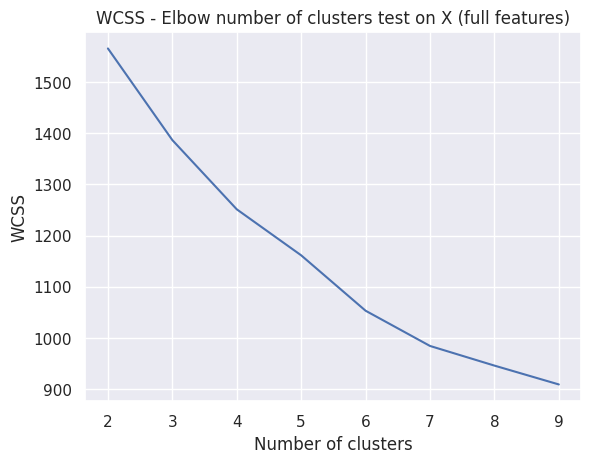

In [43]:
# On the 'X' full feature set:

# Using the elbow method to find the optimal number of clusters elbow = [] for i in range(2, 10) on the X full feature set:
elbow_wcss = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    elbow_wcss.append(kmeans.inertia_)

# Plot the WCSS - Within-Cluster Sum of Square distances inside the cluster to find a number of clusters which minimizes WCSS
plt.plot(range(2, 10), elbow_wcss)
plt.title('WCSS - Elbow number of clusters test on X (full features)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

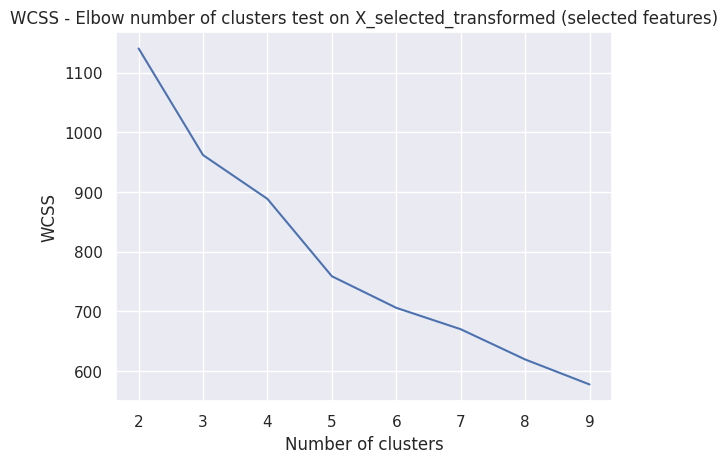

In [44]:
# On the 'X_selected' with selected features set:

# Using the elbow method to find the optimal number of clusters elbow = [] for i in range(2, 10) on the 'X_selected' with selected features set:
elbow_wcss_selected = []

for i in range(2, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_selected)
    elbow_wcss_selected.append(kmeans.inertia_)

# Plot the WCSS - Within-Cluster Sum of Square distances inside the cluster to find a number of clusters which minimizes WCSS
plt.plot(range(2, 10), elbow_wcss_selected)
plt.title('WCSS - Elbow number of clusters test on X_selected_transformed (selected features)')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.ticklabel_format(useOffset=False, style='plain')
plt.show()

In [45]:
# Run K-means model on the 'X' full feature set with n_clusters = 7:
kmeans1 = KMeans(n_clusters = 7, init = "k-means++", random_state = 42)
kmeans1.fit(X)

KMeans(n_clusters=7, random_state=42)

In [46]:
kmeans1.inertia_

984.3375346896053

In [47]:
# Save the predicted cluster labels of X into a variable
pred1_cluster_labels_k = kmeans1.predict(X)
pred1_cluster_labels_k

array([5, 5, 0, 5, 5, 5, 4, 5, 5, 0, 5, 5, 5, 4, 1, 5, 4, 5, 0, 2, 0, 0,
       5, 0, 4, 0, 4, 1, 5, 1, 5, 2, 2, 5, 0, 4, 1, 0, 4, 1, 0, 4, 1, 5,
       5, 0, 1, 5, 0, 4, 5, 3, 0, 4, 4, 1, 5, 0, 2, 0, 3, 1, 1, 1, 3, 3,
       0, 5, 5, 5, 0, 0, 1, 1, 0, 5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 5, 0,
       5, 2, 0, 3, 4, 3, 0, 0, 5, 2, 4, 4, 5, 4, 2, 4, 0, 0, 3, 0, 0, 4,
       0, 4, 3, 5, 0, 5, 1, 5, 3, 0, 5, 5, 4, 3, 0, 1, 1, 0, 1, 0, 4, 0,
       5, 1, 2, 0, 3, 2, 5, 1, 3, 4, 1, 0, 5, 6, 6, 2, 6, 6, 5, 4, 6, 6,
       5, 5, 5, 6, 6, 6, 1, 6, 6, 4, 5, 6, 6, 6, 4, 6, 2, 6, 4, 6, 6, 6,
       6, 6, 4, 5, 6, 6, 4, 6, 6, 4, 6, 4, 6, 4, 6, 6, 6, 1, 5, 6, 6, 6,
       4, 0, 4, 3, 0, 0, 5, 0, 5, 0, 3, 4, 0, 0, 5, 4, 4, 0, 5, 5, 3, 5,
       1, 1, 0, 4, 0, 6, 4, 6, 4, 2, 4, 0, 6, 4, 0, 6, 3, 0, 0, 0, 5, 6,
       1, 5, 1, 0, 1, 5, 5, 0, 0, 3, 0, 3, 3, 4, 0, 3, 4, 4, 3, 5, 0, 3,
       0, 3, 5, 0, 3, 5, 4, 1, 0, 5, 0, 0, 0, 0, 3, 0, 0, 0, 4, 0, 0, 5,
       0, 3, 3, 0, 4, 4, 0, 0, 5, 5, 0, 1, 0, 5, 5,

In [48]:
# Merge pred1_cluster_labels with our X full features data set
X['Cluster_k'] = pred1_cluster_labels_k

# View the first 5 rows of the X data set now with the cluster labels merged
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_k
0,2.0,3.0,0.601703,1.311573,0.690419,-1.470955,0.828516,0.641018,5
1,2.0,3.0,0.167531,1.327836,0.918508,0.413627,0.955926,0.881540,5
2,1.0,3.0,0.635813,-0.835228,0.125643,1.567203,-0.188949,0.887260,0
3,2.0,3.0,0.381280,1.150942,0.313847,-0.456079,0.584634,0.709880,5
4,2.0,3.0,0.569198,0.176045,0.612261,-0.748840,0.926815,-0.121811,5


In [49]:
# Run K-means model on the 'X_selected' with selected features set with n_clusters = 6:
kmeans2 = KMeans(n_clusters = 6, init = "k-means++", random_state = 42)
kmeans2.fit(X_selected)

KMeans(n_clusters=6, random_state=42)

In [50]:
kmeans2.inertia_

705.7069374433803

In [51]:
# Save the predicted cluster labels of X_selected into a variable
pred2_cluster_labels_k = kmeans2.predict(X_selected)
pred2_cluster_labels_k

array([1, 4, 0, 4, 2, 4, 2, 4, 4, 0, 4, 4, 4, 2, 1, 4, 4, 4, 0, 2, 0, 2,
       4, 0, 2, 4, 2, 1, 4, 1, 4, 1, 2, 4, 0, 1, 5, 0, 4, 1, 2, 1, 1, 4,
       4, 0, 5, 4, 4, 2, 4, 0, 0, 2, 2, 5, 4, 0, 2, 4, 0, 1, 5, 5, 5, 5,
       0, 4, 4, 4, 0, 4, 1, 1, 0, 4, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0,
       4, 5, 0, 2, 2, 2, 2, 2, 4, 5, 1, 2, 4, 4, 0, 2, 2, 0, 0, 0, 2, 2,
       0, 2, 5, 1, 0, 4, 5, 4, 0, 0, 4, 4, 2, 0, 0, 5, 1, 4, 1, 4, 2, 0,
       4, 5, 5, 0, 0, 5, 4, 1, 2, 2, 5, 2, 3, 3, 3, 5, 3, 3, 3, 3, 3, 3,
       3, 3, 4, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 1, 4, 3, 3, 3,
       1, 0, 2, 2, 4, 0, 4, 2, 4, 0, 2, 2, 0, 0, 4, 4, 2, 0, 4, 4, 5, 4,
       1, 5, 3, 2, 0, 0, 4, 0, 4, 0, 2, 4, 0, 4, 0, 0, 2, 0, 4, 0, 4, 2,
       1, 4, 1, 0, 1, 4, 4, 2, 0, 5, 0, 5, 0, 2, 0, 2, 2, 1, 2, 4, 0, 0,
       0, 2, 4, 0, 2, 4, 2, 1, 0, 4, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 4,
       0, 0, 0, 0, 2, 2, 0, 0, 4, 4, 4, 5, 0, 4, 4,

In [52]:
# Merge pred1_cluster_labels with our X_selected data set
X_selected['Cluster_k'] = pred2_cluster_labels_k

# View the first 5 rows of the X data set now with the cluster labels merged
X_selected.head()

,Region,Fresh,Grocery,Frozen,Delicassen,Cluster_k
0,3.0,0.601703,0.690419,-1.470955,0.641018,1
1,3.0,0.167531,0.918508,0.413627,0.881540,4
2,3.0,0.635813,0.125643,1.567203,0.887260,0
3,3.0,0.381280,0.313847,-0.456079,0.709880,4
4,3.0,0.569198,0.612261,-0.748840,-0.121811,2


In [53]:
# Use boolean comparison between cluster labels of customers from X and X_selected and sum up the True values.
(X['Cluster_k'] == X_selected['Cluster_k']).sum()

np.int64(96)

 HIERACHICAL CLUSTRING

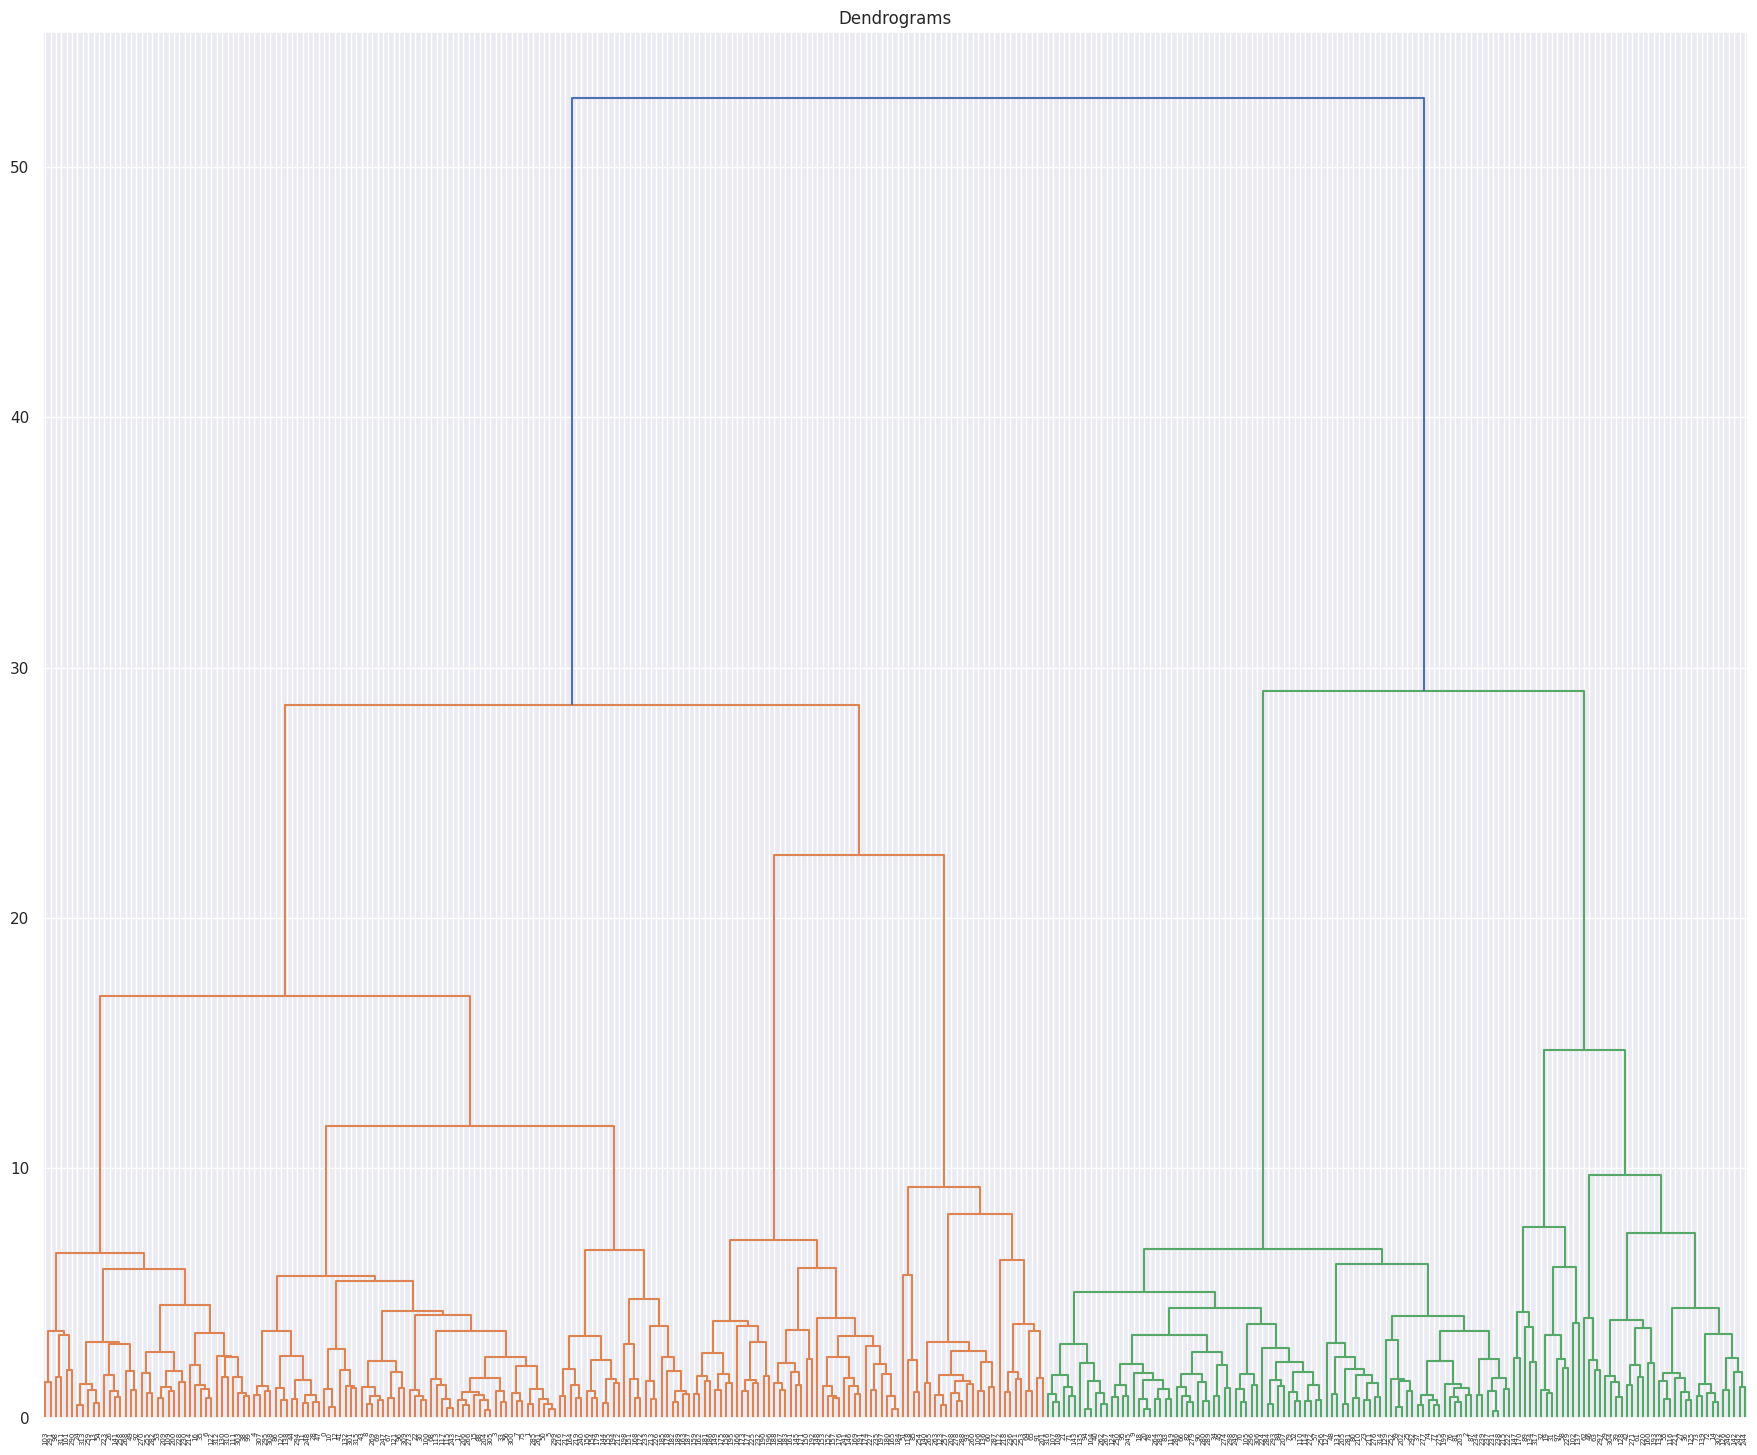

In [54]:
# Draw the first dendrogram for X (the full features data set)
plt.figure(figsize=(22, 18))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward')) # Use the default linkage algorithm 'ward'
plt.show()

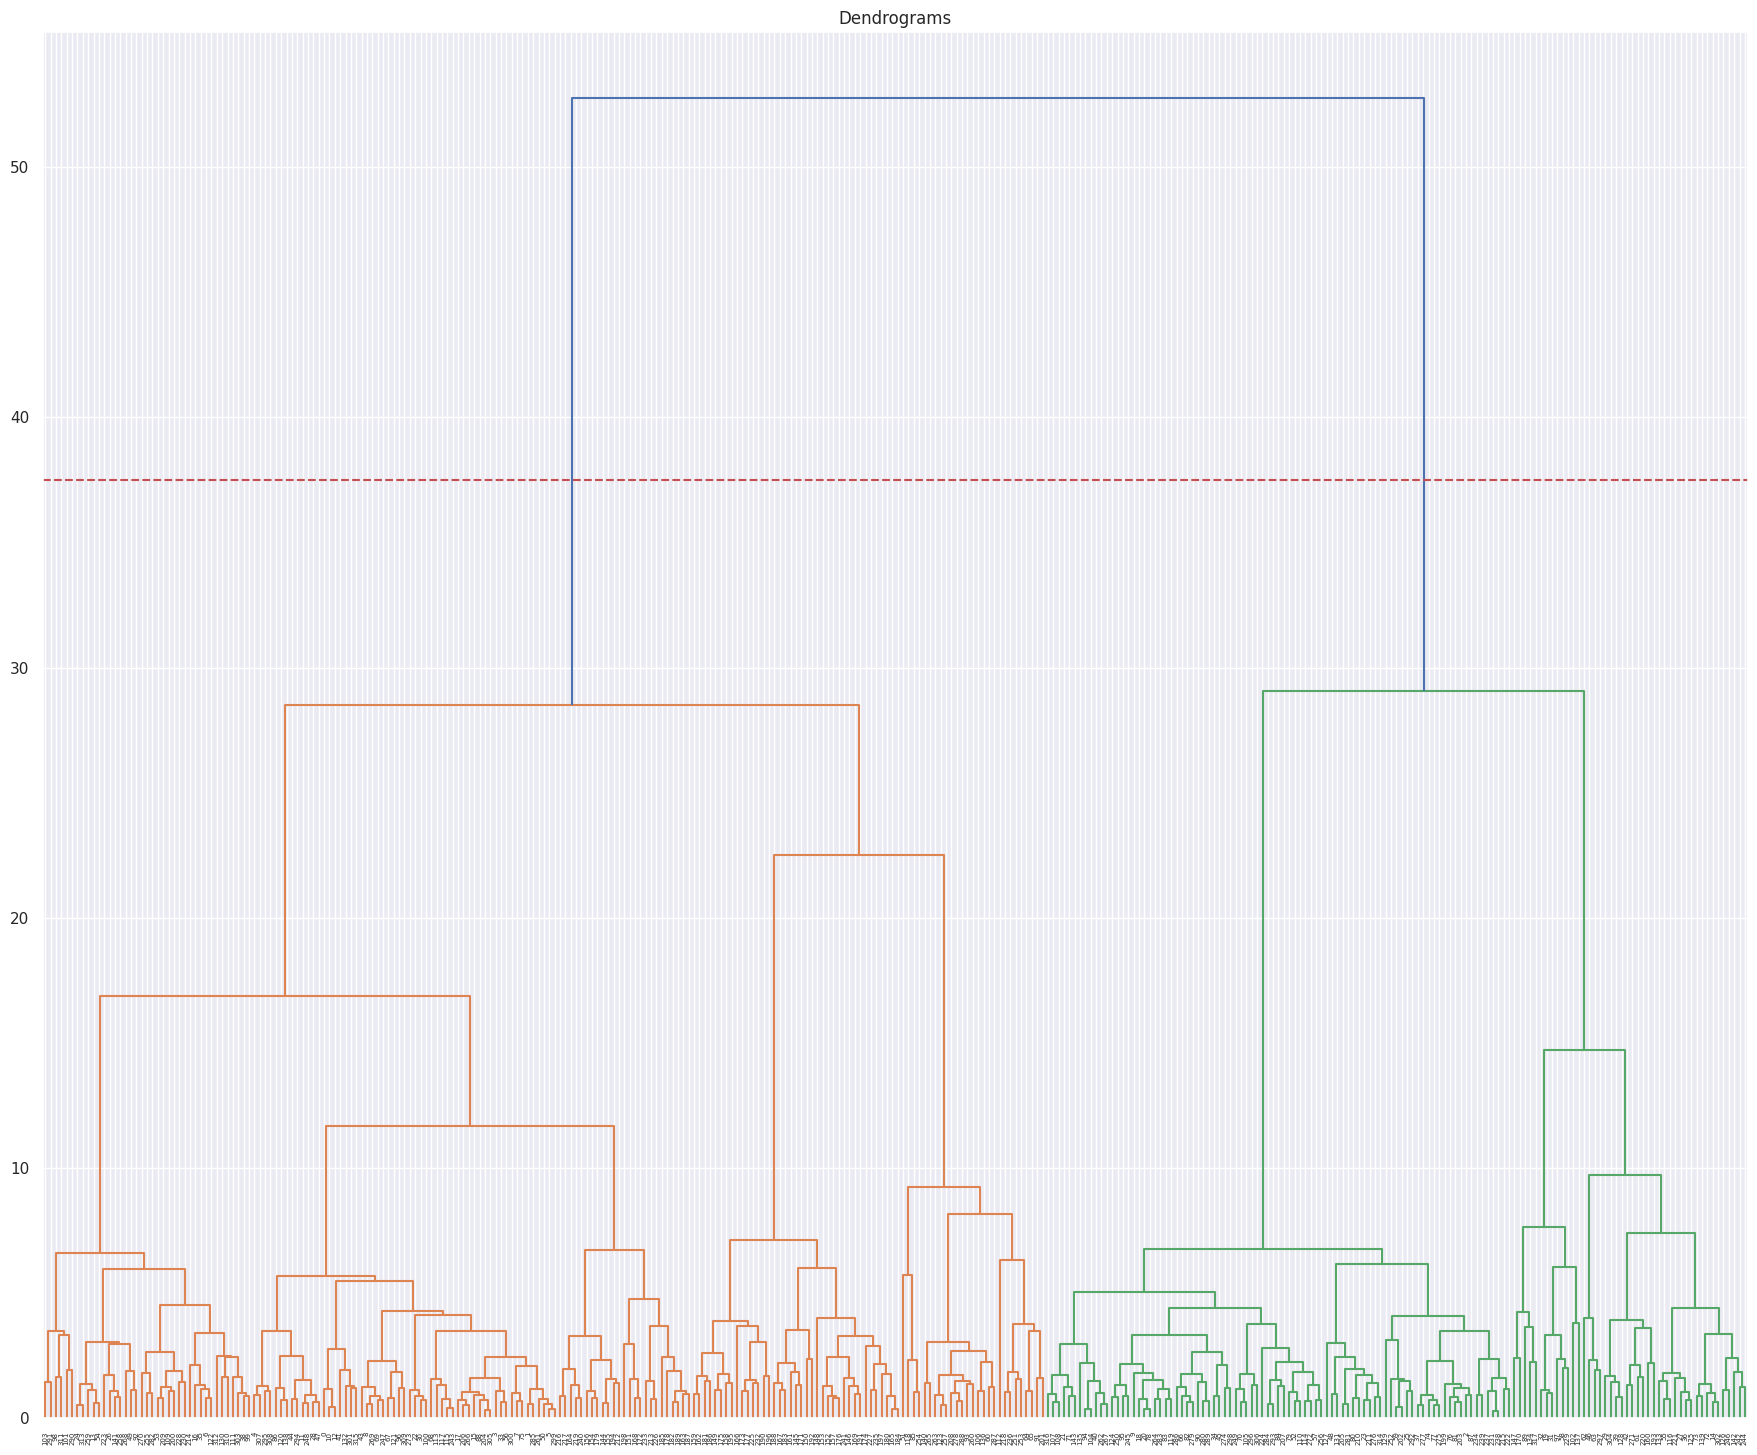

In [55]:
# Draw the second dendrogram for X (the full features data set) with a threshold of 110,000 and cut the dendrogram
plt.figure(figsize=(22, 18))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward')) # Use the default linkage algorithm 'ward'
plt.axhline(y=37.5, color='r', linestyle='--')
plt.show()

In [57]:
# Hierarchical clustering using the default linkage algorithm 'ward' on X (the full features)
hierachical_cluster1 = AgglomerativeClustering(n_clusters=2, linkage='ward') # Use the default linkage algorithm 'ward'
hierachical_cluster1.fit(X)

AgglomerativeClustering()

In [58]:
# Save the predicted cluster labels of X into a variable
pred1_cluster_labels_h = hierachical_cluster1.fit_predict(X)
pred1_cluster_labels_h

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,

In [59]:
# Merge pred1_cluster_labels_h with our X full features data set
X['Cluster_h'] = pred1_cluster_labels_h

# View the first 5 rows of the X data set now with the cluster labels merged
X.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster_k,Cluster_h
0,2.0,3.0,0.601703,1.311573,0.690419,-1.470955,0.828516,0.641018,5,1
1,2.0,3.0,0.167531,1.327836,0.918508,0.413627,0.955926,0.881540,5,1
2,1.0,3.0,0.635813,-0.835228,0.125643,1.567203,-0.188949,0.887260,0,0
3,2.0,3.0,0.381280,1.150942,0.313847,-0.456079,0.584634,0.709880,5,1
4,2.0,3.0,0.569198,0.176045,0.612261,-0.748840,0.926815,-0.121811,5,1


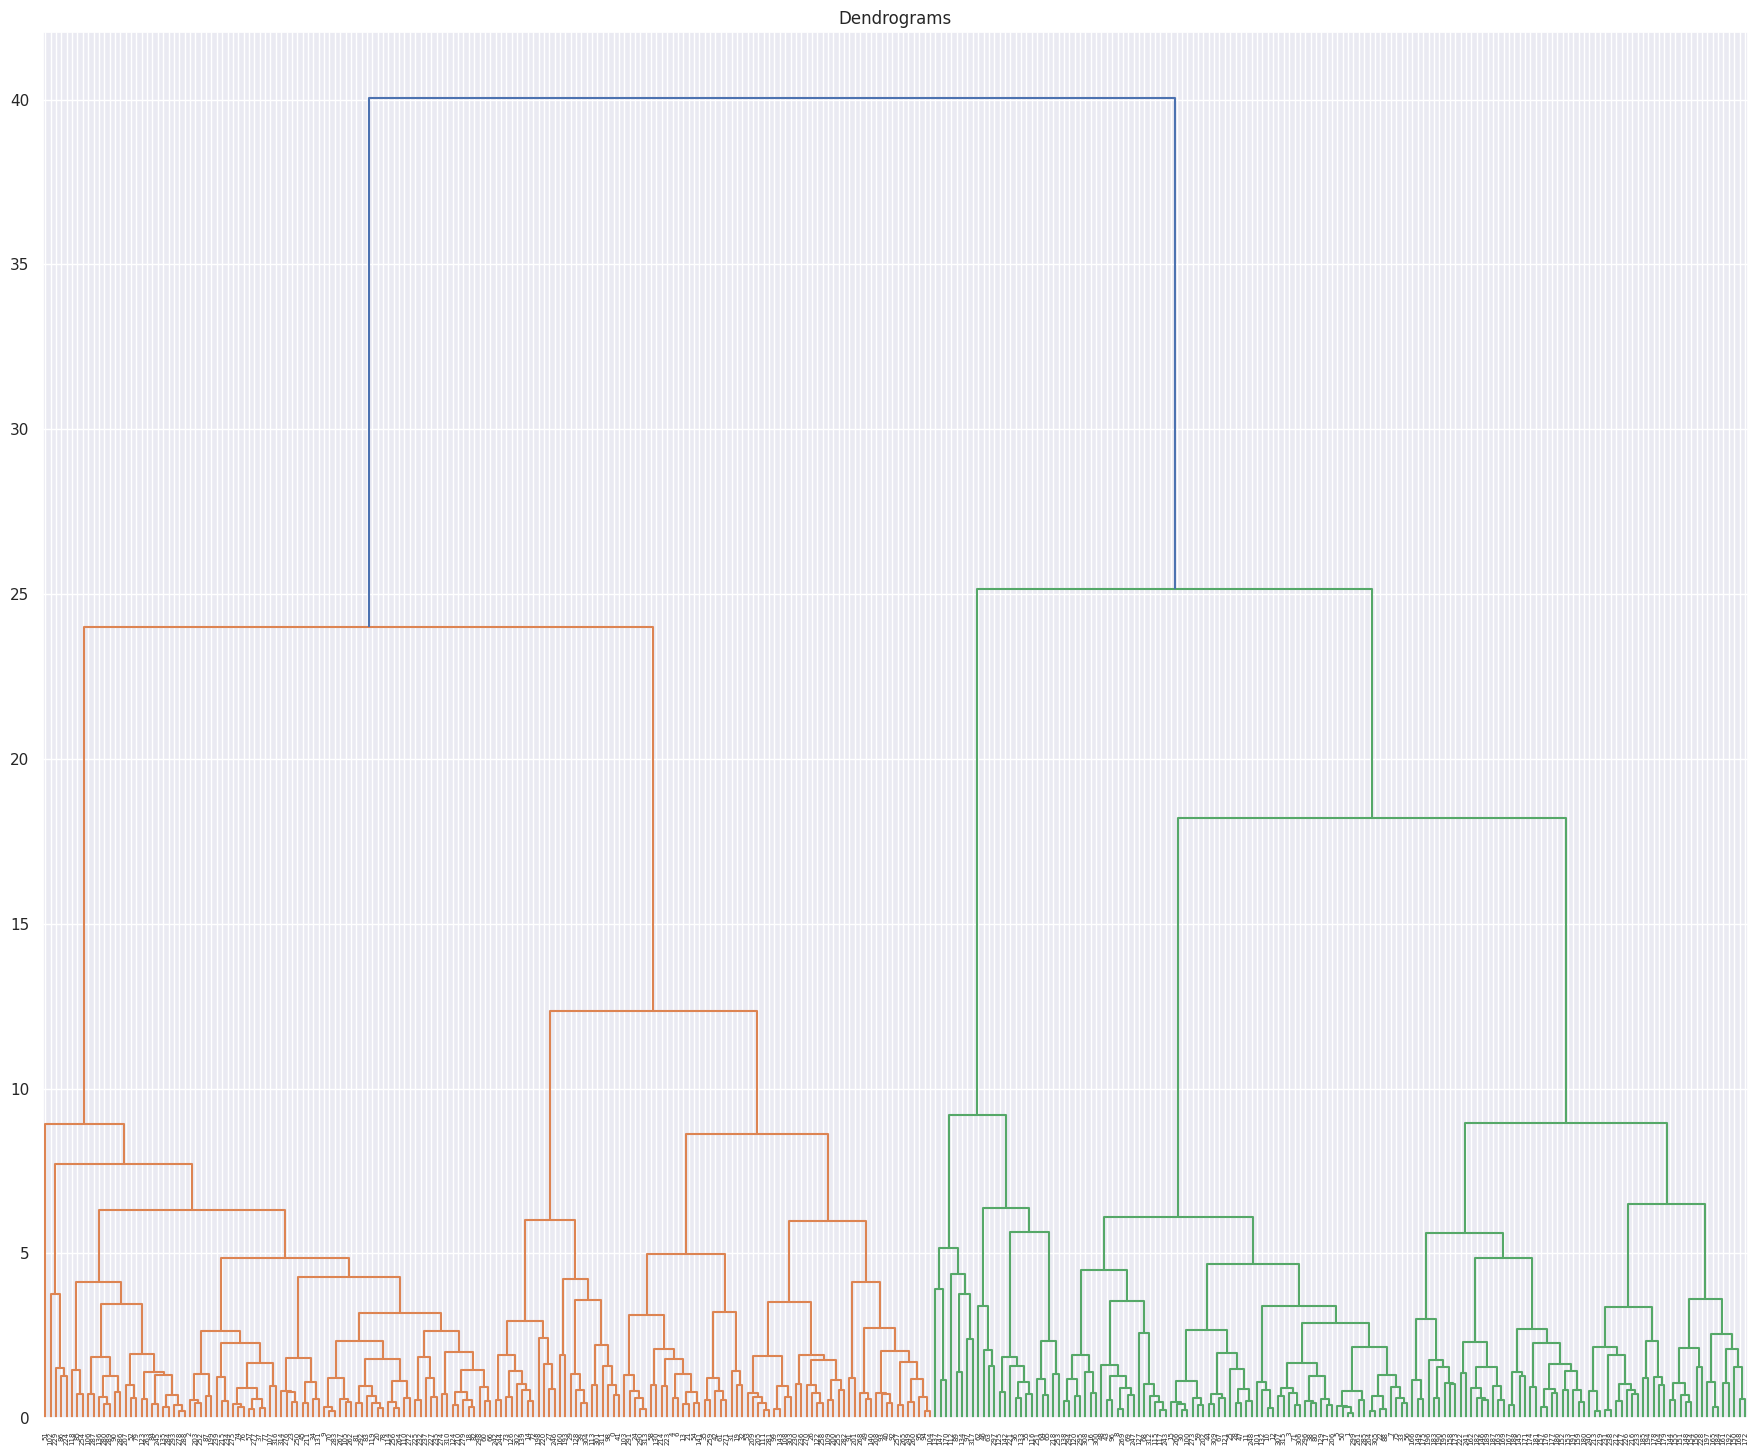

In [60]:
# Draw the first dendrogram for X_selected (the selected features data set)
plt.figure(figsize=(22, 18))
plt.title("Dendrograms")
dend2 = shc.dendrogram(shc.linkage(X_selected, method='ward')) # Use the default linkage algorithm 'ward'
plt.show()

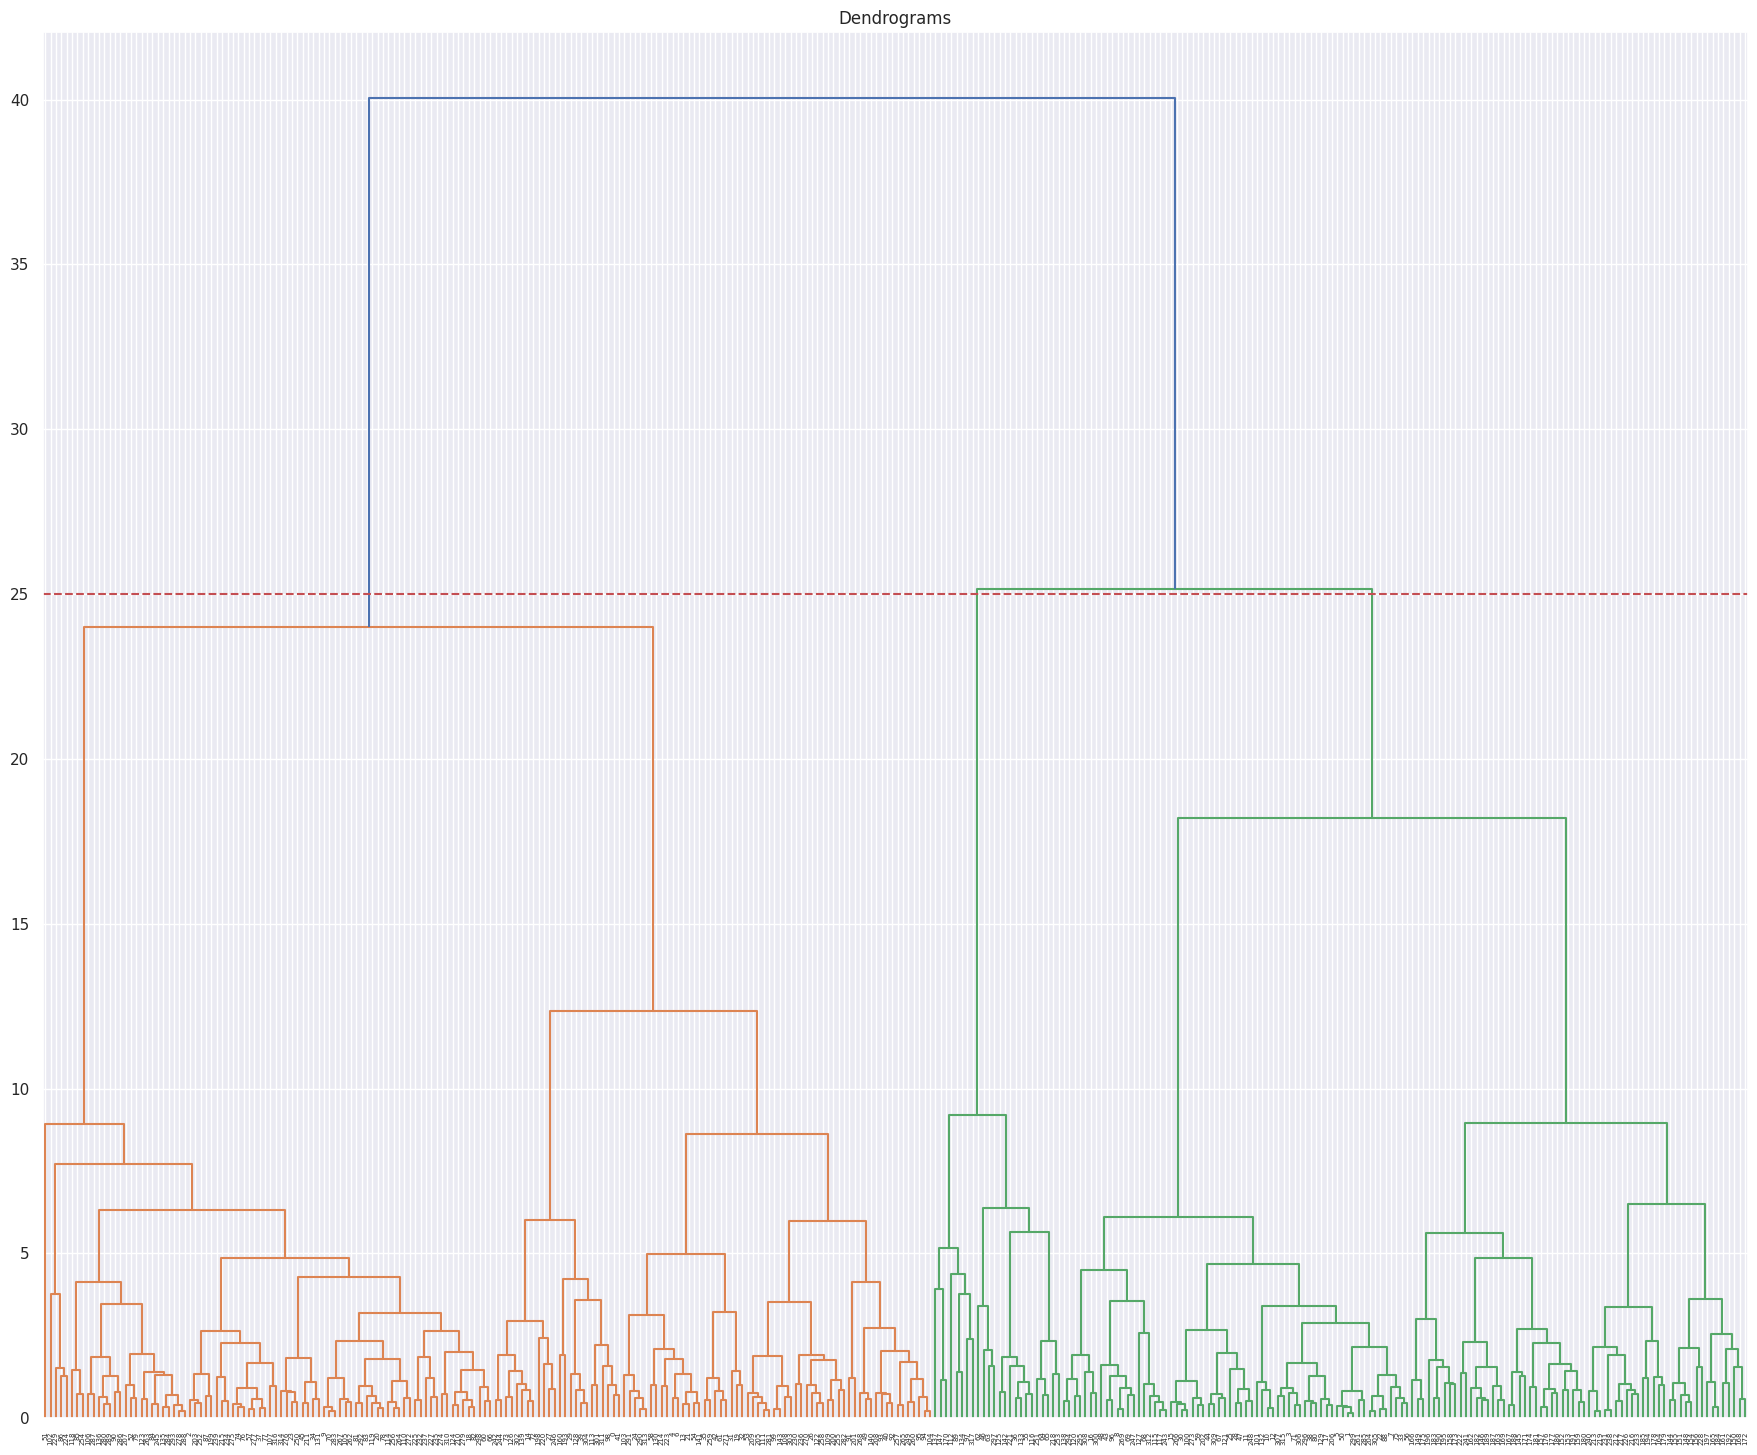

In [61]:
# Draw the second dendrogram for X_selected (the selected features data set) with a threshold of 25 and cut the dendrogram
plt.figure(figsize=(22, 18))
plt.title("Dendrograms")
dend2 = shc.dendrogram(shc.linkage(X_selected, method='ward')) # Use the default linkage algorithm 'ward'
plt.axhline(y=25, color='r', linestyle='--')
plt.show()

In [63]:
# Hierarchical clustering using the default linkage algorithm 'ward' on X_selected (the selected features data set)
hierachical_cluster2 = AgglomerativeClustering(n_clusters=2, linkage='ward') # Use the default linkage algorithm 'ward'
hierachical_cluster2.fit(X_selected)

AgglomerativeClustering()

In [64]:
# Save the predicted cluster labels of X_selected into a variable
pred2_cluster_labels_h = hierachical_cluster2.fit_predict(X_selected)
pred2_cluster_labels_h

array([1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,

In [65]:
# Merge pred1_cluster_labels with our X_selected features data set
X_selected['Cluster_h'] = pred2_cluster_labels_h

# View the first 5 rows of the X_selected data set now with the cluster labels merged
X_selected.head()

,Region,Fresh,Grocery,Frozen,Delicassen,Cluster_k,Cluster_h
0,3.0,0.601703,0.690419,-1.470955,0.641018,1,1
1,3.0,0.167531,0.918508,0.413627,0.881540,4,0
2,3.0,0.635813,0.125643,1.567203,0.887260,0,1
3,3.0,0.381280,0.313847,-0.456079,0.709880,4,0
4,3.0,0.569198,0.612261,-0.748840,-0.121811,2,1


In [66]:
# Use boolean comparison between cluster labels of customers from X and X_selected and sum up the True values.
(X['Cluster_h'] == X_selected['Cluster_h']).sum()

np.int64(97)

PCA (Principle Component Analysis)

In [67]:
# Drop the cluster labels we added to X in the K-means and Hierachical Clustering parts
X = X.drop(columns=['Cluster_k', 'Cluster_h'])

Eigenvalues:
[2.69863725 1.53599341 0.7208695  0.63450388 0.56658027 0.33817422
 0.22111254 0.09519178]

Variances (Percentage):
[39.62138235 22.5514497  10.58380337  9.31578366  8.31852944  4.96507265
  3.2463735   1.39760533]



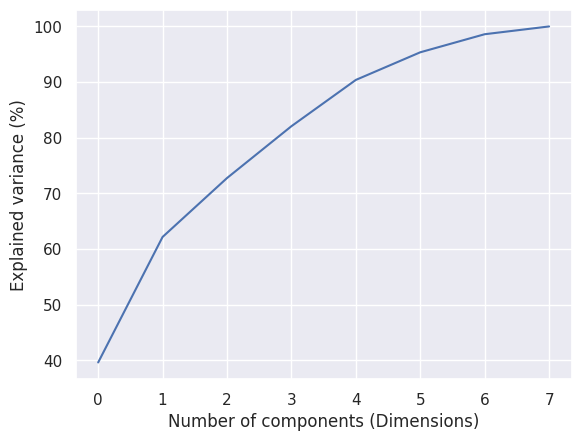

In [68]:

# Apply PCA on X - the full features data set
pca = PCA(n_components=None)
pca.fit(X)

# Get the eigenvalues
print('Eigenvalues:')
print(pca.explained_variance_)
print()

# Get explained variances
print('Variances (Percentage):')
print(pca.explained_variance_ratio_ * 100)
print()

# Make the scree plot
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('Number of components (Dimensions)')
plt.ylabel('Explained variance (%)')
plt.show()

In [69]:

# Take the abs of pca.components_
pca_components = abs(pca.components_)
print(pca_components)

[[0.19003513 0.06549245 0.12420872 0.52620877 0.5553759  0.22179653
  0.53712748 0.14536812]
 [0.02077648 0.0435711  0.61303839 0.13211712 0.05077374 0.51783547
  0.0153478  0.57743554]
 [0.03412241 0.34587104 0.00995327 0.04505587 0.14320692 0.63635249
  0.26544502 0.61738645]
 [0.02100515 0.06546951 0.77615931 0.02787996 0.08316006 0.41897662
  0.00167082 0.45783421]
 [0.05874861 0.92990868 0.02149156 0.01134895 0.02866827 0.30540148
  0.05544298 0.18455867]
 [0.11136274 0.0212443  0.06246239 0.78512602 0.0968337  0.06202139
  0.57727058 0.14268101]
 [0.14048233 0.0421592  0.03975987 0.28740048 0.80701336 0.06880504
  0.48815018 0.00348479]
 [0.96242459 0.05422544 0.01701475 0.06075672 0.00930724 0.01777591
  0.25727189 0.01504   ]]


In [70]:
# Features in the decreasing importance sequence in each component (8 components in total)
print('Features in importance sequence in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top values in each row
    temp = np.argpartition(-(pca_components[row]), 7)

    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:8]

    # print the top 4 feature names
    print(f'Component {row}: {X.columns[indices].to_list()}')

Features in importance sequence in each component
Component 0: ['Grocery', 'Detergents_Paper', 'Milk', 'Frozen', 'Channel', 'Delicassen', 'Fresh', 'Region']
Component 1: ['Fresh', 'Delicassen', 'Frozen', 'Milk', 'Grocery', 'Region', 'Channel', 'Detergents_Paper']
Component 2: ['Frozen', 'Delicassen', 'Region', 'Detergents_Paper', 'Grocery', 'Milk', 'Channel', 'Fresh']
Component 3: ['Fresh', 'Delicassen', 'Frozen', 'Grocery', 'Region', 'Milk', 'Channel', 'Detergents_Paper']
Component 4: ['Region', 'Frozen', 'Delicassen', 'Channel', 'Detergents_Paper', 'Grocery', 'Fresh', 'Milk']
Component 5: ['Milk', 'Detergents_Paper', 'Delicassen', 'Channel', 'Grocery', 'Fresh', 'Frozen', 'Region']
Component 6: ['Grocery', 'Detergents_Paper', 'Milk', 'Channel', 'Frozen', 'Region', 'Fresh', 'Delicassen']
Component 7: ['Channel', 'Detergents_Paper', 'Milk', 'Region', 'Frozen', 'Fresh', 'Delicassen', 'Grocery']


In [71]:
# Apply PCA again with n_components=2
pca2 = PCA(n_components=3)
X_pca = pca2.fit_transform(X)

# Get the transformed dataset
X_pca = pd.DataFrame(X_pca)
X_pca.head()

,0,1,2
0,2.030797,0.194328,-1.087275
1,1.905364,1.058639,0.035028
2,-0.791369,1.581997,0.211890
3,1.418429,0.580418,-0.607678
4,1.175647,-0.044628,-0.192733


In [72]:
# View the number of columns and rows of the transformed data X_pca
X_pca.shape

(318, 3)

In [73]:
# Review the cleaned up dataset with full features
X.shape

(318, 8)

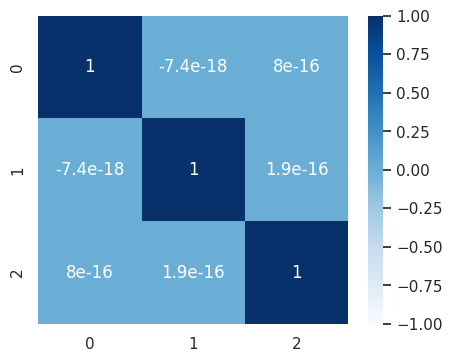

In [74]:
# Use a correlation matrix heatmap to check the relationship between the different variables in the PCA transformed version of X
plt.figure(figsize=(5, 4))
heatmap_pca = sns.heatmap(X_pca.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
plt.show()